<a href="https://colab.research.google.com/github/muhammad-naeem-tahir/Assignments/blob/main/PIAIC129482_Final_Ionosphere_asignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()


Saving ionosphere_data.csv to ionosphere_data.csv


In [84]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [85]:
import io
df = pd.read_csv(io.BytesIO(uploaded['ionosphere_data.csv']))

In [86]:
df.shape

(351, 35)

In [87]:
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [88]:
df.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,0.476183,0.155040,0.400801,0.093414,0.344159,0.071132,0.381949,-0.003617,0.359390,-0.024025,0.336695,0.008296,0.362475,-0.057406,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,0.563496,0.494817,0.622186,0.494873,0.652828,0.458371,0.618020,0.496762,0.626267,0.519076,0.609828,0.518166,0.603767,0.527456,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,0.021120,-0.065265,0.000000,-0.073725,0.000000,-0.081705,0.000000,-0.225690,0.000000,-0.234670,0.000000,-0.243870,0.000000,-0.366885,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,0.667980,0.028250,0.644070,0.030270,0.601940,0.000000,0.590910,0.000000,0.576190,0.000000,0.499090,0.000000,0.531760,0.000000,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,0.957895,0.482375,0.955505,0.374860,0.919330,0.308975,0.935705,0.195285,0.899265,0.134370,0.894865,0.188760,0.911235,0.164630,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##drop useless column

In [89]:
df.drop(df.columns[1], inplace=True, axis=1)

In [90]:
df.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature3   351 non-null    float64
 2   feature4   351 non-null    float64
 3   feature5   351 non-null    float64
 4   feature6   351 non-null    float64
 5   feature7   351 non-null    float64
 6   feature8   351 non-null    float64
 7   feature9   351 non-null    float64
 8   feature10  351 non-null    float64
 9   feature11  351 non-null    float64
 10  feature12  351 non-null    float64
 11  feature13  351 non-null    float64
 12  feature14  351 non-null    float64
 13  feature15  351 non-null    float64
 14  feature16  351 non-null    float64
 15  feature17  351 non-null    float64
 16  feature18  351 non-null    float64
 17  feature19  351 non-null    float64
 18  feature20  351 non-null    float64
 19  feature21  351 non-null    float64
 20  feature22 

In [92]:
df.isnull().sum()

feature1     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [93]:
from sklearn.utils import shuffle
df = shuffle(df)

In [94]:
df['label'] = [1 if lbl == 'g' else 0 for lbl in df['label']]

In [95]:
np.random.seed(11111)
msk = np.random.rand(len(df)) <= 0.60
train_data = df[msk]
val_data = df[~msk]
test_data = df[~msk]

In [96]:
train_label = train_data.iloc[:,-1]
train_data = train_data.iloc[:,0:-1]
test_label = test_data.iloc[:,-1]
test_data = test_data.iloc[:,0:-1]
val_label = val_data.iloc[:,-1]
val_data = val_data.iloc[:,0:-1]

In [97]:
train_data.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
5,1,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,0.03786,-0.06302,0.00000,0.00000,-0.04572,-0.15540,-0.00343,-0.10196,-0.11575,-0.05414,0.01838,0.03669,0.01519,0.00888,0.03513,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011
210,0,-1.00000,-1.00000,1.00000,-1.00000,-1.00000,1.00000,0.00000,0.00000,1.00000,-1.00000,1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,1.00000,1.00000,-1.00000,-1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.50000,0.00000,0.00000
26,1,1.00000,-0.08714,1.00000,-0.17263,0.86635,-0.81779,0.94817,0.61053,0.95473,-0.41382,0.88486,-0.31736,0.87937,-0.23433,0.81051,-0.62180,0.12245,-1.00000,0.90284,0.11053,0.62357,-0.78547,0.55389,-0.82868,0.48136,-0.86583,0.40650,-0.89674,0.32984,-0.92128,-0.13341,-1.00000
230,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
331,1,0.74468,0.10638,0.88706,0.00982,0.88542,0.01471,0.87234,-0.01418,0.73050,0.10638,0.87657,0.02912,0.87235,0.03382,0.95745,0.07801,0.95035,0.04255,0.85597,0.04743,0.84931,0.05178,0.87234,0.11348,0.83429,0.06014,0.74468,-0.03546,0.81710,0.06800,0.80774,0.07173


In [98]:
train_label

5      0
210    0
26     1
230    0
331    1
      ..
254    1
114    0
264    1
56     1
215    1
Name: label, Length: 204, dtype: int64

In [99]:
# # Normalize the data
train_mean = train_data.mean()
train_data -= train_mean
train_std = train_data.std()
train_data /= train_std
test_data -= train_mean
test_data /= train_std

In [100]:
train_data.shape


(204, 33)

In [101]:
test_data.shape


(147, 33)

In [102]:
val_data.shape

(147, 33)

In [103]:
train_data = train_data.to_numpy()

In [104]:
train_label = train_label.to_numpy().astype('float32')

In [105]:
test_data = test_data.to_numpy()

In [106]:
test_label = test_label.to_numpy().astype('float32')

In [107]:
val_data = val_data.to_numpy()

In [108]:
val_label = val_label.to_numpy().astype('float32')

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [110]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(train_data.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1,  activation='sigmoid'))

In [111]:
model.compile(optimizer = 'RMSprop', loss='binary_crossentropy', metrics=['accuracy'])

In [112]:
history = model.fit(train_data, train_label, validation_data=(val_data,val_label), epochs=100, batch_size = 16)

Epoch 1/100
13/13 [==============================] - 1s 15ms/step - loss: 0.6607 - accuracy: 0.6860 - val_loss: 0.6176 - val_accuracy: 0.7755
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 0.5721 - accuracy: 0.8352 - val_loss: 0.5955 - val_accuracy: 0.7823
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5789 - accuracy: 0.7992 - val_loss: 0.5773 - val_accuracy: 0.7687
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5484 - accuracy: 0.8361 - val_loss: 0.5656 - val_accuracy: 0.7755
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5290 - accuracy: 0.8513 - val_loss: 0.5554 - val_accuracy: 0.7755
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 0.4993 - accuracy: 0.8515 - val_loss: 0.5470 - val_accuracy: 0.7755
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 0.4587 - accuracy: 0.8718 - val_loss: 0.5392 - val_accuracy: 0.7687
Epoch 8/100


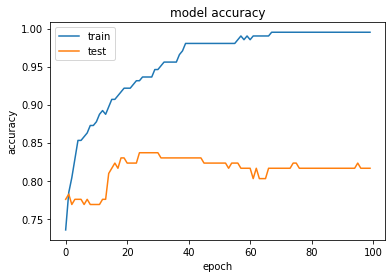

In [113]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

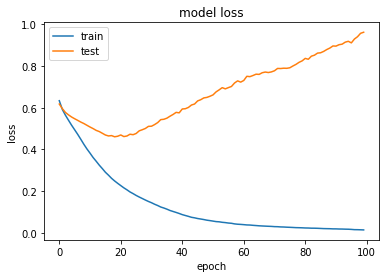

In [114]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [138]:
model_1 = Sequential()
model_1.add(Dense(5, activation='relu', input_shape=(train_data.shape[1],)))
model_1.add(Dropout(0.3))
model_1.add(Dense(5, activation='relu'))
model_1.add(Dropout(0.3))
model_1.add(Dense(5, activation='relu'))
model_1.add(Dropout(0.3))
model_1.add(Dense(5, activation='relu'))
model_1.add(Dense(1,  activation='sigmoid'))

In [139]:
model_1.compile(optimizer = 'rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [140]:
history_1 = model_1.fit(train_data, train_label, validation_data=(val_data,val_label), epochs=100, batch_size = 5)

Epoch 1/100
41/41 [==============================] - 1s 7ms/step - loss: 0.6949 - accuracy: 0.5416 - val_loss: 0.6787 - val_accuracy: 0.7075
Epoch 2/100
41/41 [==============================] - 0s 4ms/step - loss: 0.6616 - accuracy: 0.6798 - val_loss: 0.6706 - val_accuracy: 0.7415
Epoch 3/100
41/41 [==============================] - 0s 4ms/step - loss: 0.6564 - accuracy: 0.6220 - val_loss: 0.6651 - val_accuracy: 0.7279
Epoch 4/100
41/41 [==============================] - 0s 4ms/step - loss: 0.6555 - accuracy: 0.7059 - val_loss: 0.6607 - val_accuracy: 0.7279
Epoch 5/100
41/41 [==============================] - 0s 4ms/step - loss: 0.6828 - accuracy: 0.6682 - val_loss: 0.6557 - val_accuracy: 0.7075
Epoch 6/100
41/41 [==============================] - 0s 4ms/step - loss: 0.6093 - accuracy: 0.7553 - val_loss: 0.6480 - val_accuracy: 0.7279
Epoch 7/100
41/41 [==============================] - 0s 4ms/step - loss: 0.6282 - accuracy: 0.7302 - val_loss: 0.6422 - val_accuracy: 0.7279
Epoch 8/100
4

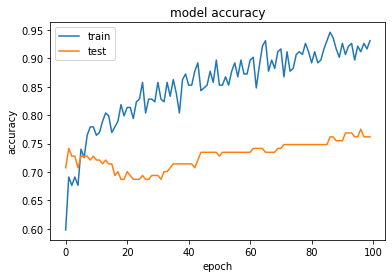

In [141]:
import matplotlib.pyplot as plt
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

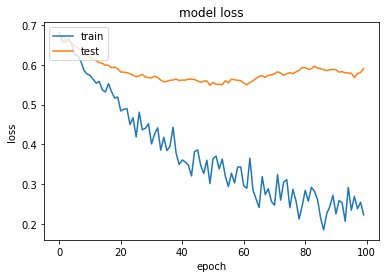

In [142]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [143]:
score = model.evaluate(test_data, test_label)
score_1 = model_1.evaluate(test_data, test_label)


5/5 [==============================] - 0s 2ms/step - loss: 0.2123 - accuracy: 0.9524


In [148]:
predictions=model_1.predict(test_data)

In [149]:
y_pred = (predictions > 0.5)

In [150]:
tf.math.confusion_matrix(
    test_label, y_pred, num_classes=2, weights=None, dtype=tf.dtypes.int32,
    name=None
)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[44,  6],
       [ 1, 96]], dtype=int32)>

In [151]:
from sklearn.metrics import classification_report
print(classification_report(test_label,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.88      0.93        50
         1.0       0.94      0.99      0.96        97

    accuracy                           0.95       147
   macro avg       0.96      0.93      0.95       147
weighted avg       0.95      0.95      0.95       147

